In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
from matplotlib import font_manager as fm
import matplotlib as mpl

In [5]:
# old cases from previous group
old_cases = pd.read_csv('cases.csv')
old_cases.head()

/Users/ecyecy/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (5,10,23,42,52,53,54,91,98,107,108,110,115,118,139,142,144) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Case Id,Case Name,Case Type,Case Status,Entry Date,Argued Date,Status Date,Decision Date,Has Affirm,Has Reverse,...,Pro Se Amicus,Pro Se pet,Amicus (defendant),Pro Se Petitioner,Out-of-state counsel for defendant,Route to SJC,comp,Student attorney purs to SJC 3:03,Pro Se poth,Out-of-state counsel for appellee
0,2008-P-0100,COMMONWEALTH vs. ANGEL RODRIGUEZ,Criminal,Closed: Rescript issued,01/17/2008,NaN,06/08/2009,04/03/2009,Yes,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2008-P-1000,Commonwealth vs. Edward A. Amaral,Criminal,Closed: Rescript issued,06/13/2008,NaN,10/06/2010,07/23/2010,Yes,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2008-P-1001,Commonwealth vs. James A. Moorcraft,Criminal,Closed: Rescript issued,06/13/2008,NaN,09/01/2010,05/14/2010,Yes,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2008-P-1005,COMMONWEALTH vs. ARIEL MALDONADO,Criminal,Closed: Rescript issued,06/13/2008,NaN,05/20/2009,04/22/2009,Yes,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2008-P-1009,COMMONWEALTH vs. DAVID E. GARCIA,Criminal,Closed: Rescript issued,06/16/2008,NaN,09/29/2009,09/01/2009,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# Data cleaning, show cases are appealed or not

old_cases_app = old_cases[old_cases['Court Type'] == 'APPEALS COURT']
old_cases_sjc = old_cases[old_cases['Court Type'] == 'SUPREME JUDICIAL COURT']
old_cases_sjc = old_cases_sjc[['Case Name', 'Case Type', 'Has Affirm', 'Has Reverse', 'Court Type']]
old_cases_sjc.head()

old_cases_sjc["Has Affirm"]= old_cases_sjc["Has Affirm"].astype(str)
old_cases_sjc["Has Reverse"]= old_cases_sjc["Has Reverse"].astype(str)

def define_reverse(df):
    appealed = []
    for i, row in df.iterrows():
        if (row['Has Affirm']  ==   'Yes' ) & (row['Has Reverse'] ==   'nan' ):
            appealed.append('No')
        elif (row['Has Affirm']  ==   'nan' ) & (row['Has Reverse']  ==   'Yes' ):
            appealed.append('Yes')
        else:
            appealed.append('Partially')
    return appealed

old_cases_sjc['appealed'] = define_reverse(old_cases_sjc)
old_cases_sjc = old_cases_sjc.drop(['Has Reverse', 'Has Affirm', 'Court Type'], axis = 1)
old_cases_sjc.head()

,Case Name,Case Type,appealed
6225,COMMONWEALTH vs. LUIS VASQUEZ (and five compan...,Criminal,No
6226,COMMONWEALTH vs. TU TRINH,Criminal,No
6227,COMMONWEALTH vs. DERYCK LONG & another,Criminal,No
6228,COMMONWEALTH vs. RODOLFO CARR,Criminal,No
6229,Commonwealth v. Joseph Facella,Criminal,No


In [7]:
new_cases_sjc = pd.read_csv('new_sjc_data.csv')

In [8]:
# Preprocessing for concating old cases dataframe and new cases dataframe
new_cases_sjc = new_cases_sjc.loc[:, ~new_cases_sjc.columns.str.contains('^Unnamed')]
new_cases_sjc = new_cases_sjc.rename(columns={'cases': 'Case Name', 'type' : 'Case Type' })
new_cases_sjc = new_cases_sjc.drop(['headnote','text','caseid', 'judge'], axis = 1)

In [9]:
new_cases_sjc['Case Type'] = new_cases_sjc['Case Type'].str.capitalize()
new_cases_sjc.head()

,Case Name,Case Type,appealed
0,in the matter of e.c.,Criminal,Yes
1,commonwealth vs. joseph wright.,Criminal,No
2,"brian rafferty vs. merck & co., inc., & anot...",Civil,No
3,commonwealth vs. johnelle m. brown.,Criminal,No
4,commonwealth vs. g.f.,Civil,Partially


In [10]:
# combine 2 dataframes together for analyzing
all_cases_sjc = pd.concat([old_cases_sjc,new_cases_sjc],axis= 0)
all_cases_sjc

,Case Name,Case Type,appealed
6225,COMMONWEALTH vs. LUIS VASQUEZ (and five compan...,Criminal,No
6226,COMMONWEALTH vs. TU TRINH,Criminal,No
6227,COMMONWEALTH vs. DERYCK LONG & another,Criminal,No
6228,COMMONWEALTH vs. RODOLFO CARR,Criminal,No
6229,Commonwealth v. Joseph Facella,Criminal,No
6230,COMMONWEALTH vs. JIMMY ALCIDE,Criminal,Partially
6231,COMMONWEALTH vs. ERIC J. DURAND,Criminal,Yes
6232,IMPOUNDED CASE,Criminal,Partially
6233,COMMONWEALTH vs. FRANCIS X. LANG,Criminal,No
6234,COMMONWEALTH vs. SINY VAN TRAN (and thirteen c...,Criminal,No


In [11]:
# Count cases that are affirmed, reversed, and partially reversed

total_count = all_cases_sjc.appealed.count()

reverse_count = all_cases_sjc.loc[(all_cases_sjc['appealed'] == 'Yes')].appealed.count()
affirm_count = all_cases_sjc.loc[(all_cases_sjc['appealed'] == 'No')].appealed.count()
partially_reverse_count = all_cases_sjc.loc[(all_cases_sjc['appealed'] == 'Partially')].appealed.count()
print('reverse_count = ', reverse_count, '    affirm_count = ' , affirm_count, '    partially_reverse_count = ' , partially_reverse_count )

reverse_count =  136     affirm_count =  468     partially_reverse_count =  150


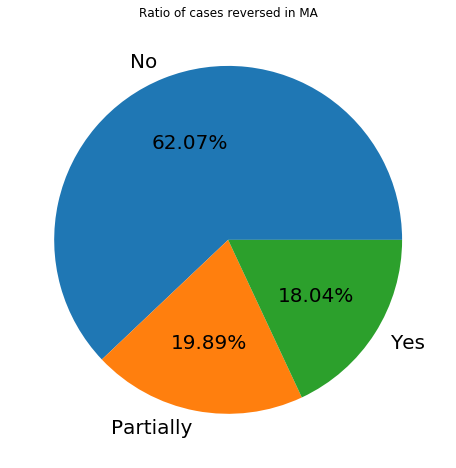

In [12]:
# Visulize as pie chart

all_cases_sjc_pie_chart = all_cases_sjc.groupby('appealed').size()
all_cases_sjc_pie_chart.plot(kind='pie', autopct='%.2f%%', fontsize=20, figsize=(8, 8), subplots = True, legend = False)
plt.title("Ratio of cases reversed in MA")
plt.ylabel("")
plt.show()

In [13]:
# Read from appeal court (new cases)
# # Count cases that are from appeal court, SJC, and the total number

new_case_app = pd.read_csv('new_case_data.csv')

appeal_cases_count =  new_case_app.cases.count() + old_cases_app.URL.count()
sjc_cases_count =  all_cases_sjc.appealed.count()
all_cases_count = sjc_cases_count + appeal_cases_count

print ('appeal_cases_count = ', appeal_cases_count,  '    sjc_cases_count = ',sjc_cases_count,  '   all_cases_count = ',   all_cases_count)

appeal_cases_count =  6517     sjc_cases_count =  754    all_cases_count =  7271


Text(0.5, 1.0, 'Count and ratio of cases from appeal court or SJC')

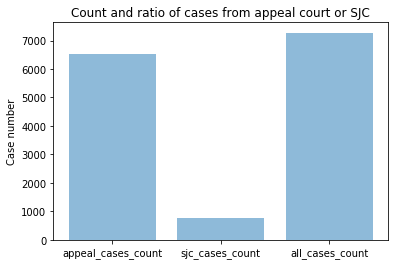

In [14]:
# Visualize as bar plot

objects = ('appeal_cases_count', 'sjc_cases_count', 'all_cases_count')
y_pos = np.arange(len(objects))
performance = [appeal_cases_count ,sjc_cases_count ,all_cases_count]
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Case number')
plt.title('Count and ratio of cases from appeal court or SJC')

In [15]:
# prepare for distribution among civil vs criminal cases from SJC in MA
all_cases_sjc_CaseType = all_cases_sjc[['Case Type']][all_cases_sjc['appealed'] == "No"]

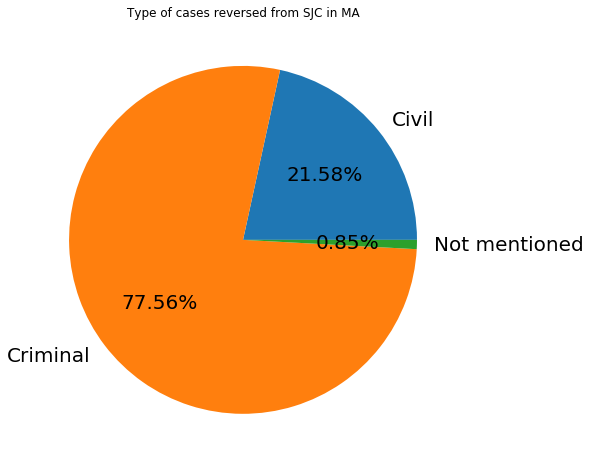

In [16]:
# Visualize as pie chart

all_cases_sjc_CaseType_pie_chart = all_cases_sjc_CaseType.groupby('Case Type').size()
all_cases_sjc_CaseType_pie_chart.plot(kind='pie', autopct='%.2f%%', fontsize=20, figsize=(8, 8), subplots = True, legend = False)
plt.title("Type of cases reversed from SJC in MA")
plt.ylabel("")
plt.show()